In [49]:
import pandas as pd
import numpy as np
import os
import pandas as pd
import matplotlib as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Partage du data_set en train et test:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
#pour le test de chi2
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier

In [50]:
#changer de répertoir de travail
os.chdir('C:\\Users\Admin\Desktop\Docier_pandas')

In [51]:
#lire le contenue de la data_frame
df = pd.read_csv(r"C:\Users\Admin\Desktop\Docier_pandas\Dataset1.csv" ,sep=';')#, na_values= 'Unknown')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [52]:
#suppression de la colonne CLIENTNUM
df.drop(['CLIENTNUM'] , axis=1, inplace=True)

In [53]:
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [55]:
#ranger les variables qualitatives
def quali():
    quali = []
    for col in df.select_dtypes('object'):
        quali.append(col)
    return quali

In [56]:
quali()

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [57]:
def quanti():
    quanti = []
    for col in df.select_dtypes('int64')  :
        quanti.append(col)
    for col in df.select_dtypes('float64'):
        quanti.append(col)
    return quanti

In [58]:
quanti()

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Total_Revolving_Bal',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Credit_Limit',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [59]:
#
def encodage_var_quali(df):
    df.Attrition_Flag.replace({'Existing Customer': 1, 'Attrited Customer': 0}, inplace=True)
    df.Gender.replace({'F': 0, 'M': 1}, inplace=True)
    df.Education_Level.replace({'Graduate': 0, 'High School': 1, 'Unknown': 2,'Uneducated':3,'College':4,'Post-Graduate':5,'Doctorate':6}, inplace=True)
    df.Marital_Status.replace({'Married': 0, 'Single': 1,'Unknown':2,'Divorced':3}, inplace=True)
    df.Income_Category.replace({'Less than $40K': 0,'$80K - $120K': 1, '$60K - $80K': 2,'Unknown':3,'$40K - $60K': 4,'$120K +': 5}, inplace=True)
    df.Card_Category.replace({'Blue': 0, 'Silver': 1,'Gold':2,'Platinum':3}, inplace=True)
    return df

In [60]:
#encodege des variables qua
encodage_var_quali(df) 

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,1,0,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,0,1,0,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,0,0,1,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,1,2,0,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,3,0,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,1,2,0,1,4,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,0,41,1,2,2,3,4,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,0,44,0,1,1,0,0,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,0,30,1,2,0,2,4,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [61]:
#selection des variables pertinantes
x = df.drop('Attrition_Flag',axis=1)
y = df.Attrition_Flag

#Retourne le score de la pertinance des variables sur le y
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_ ) 

[0.03232907 0.01767658 0.02538384 0.02421512 0.02232166 0.02124497
 0.00678201 0.02889944 0.07123491 0.04082138 0.04952159 0.03316591
 0.11698368 0.03176531 0.04918099 0.14434756 0.16334591 0.07594929
 0.04483077]


In [62]:
#selection des variables dont le score de l'influence sur la variable cible est supérieur ou églae 0.05
print(model.feature_importances_ >=0.04) 

[False False False False False False False False  True  True  True False
  True False  True  True  True  True  True]


In [63]:
#liste des variables pertinantes
liste=['Months_on_book','Months_Inactive_12_mon','Credit_Limit','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1']

In [64]:
#construction du df_final
df_final = pd.DataFrame(df,columns=liste)
df_final

,Months_on_book,Months_Inactive_12_mon,Credit_Limit,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
0,39,1,12691.0,11914.0,1.335,1144,42,1.625
1,44,1,8256.0,7392.0,1.541,1291,33,3.714
2,36,1,3418.0,3418.0,2.594,1887,20,2.333
3,34,4,3313.0,796.0,1.405,1171,20,2.333
4,21,1,4716.0,4716.0,2.175,816,28,2.500
...,...,...,...,...,...,...,...,...
10122,40,2,4003.0,2152.0,0.703,15476,117,0.857
10123,25,2,4277.0,2091.0,0.804,8764,69,0.683
10124,36,3,5409.0,5409.0,0.819,10291,60,0.818
10125,36,3,5281.0,5281.0,0.535,8395,62,0.722


In [65]:
#empaquetage de X et y
X = df_final
y = df.Attrition_Flag

In [66]:
#Diviser le dataset en trainset et testset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Construction des Models

# Régression logistique 

In [67]:
# Construction du modèle
classifier = LogisticRegression(random_state = 0, solver='liblinear')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
score_train = classifier.score(X_train,y_train)
score_test = classifier.score(X_test,y_test)

print(score_train)
print(score_test)


0.8714973460066658
0.8687068114511353


In [69]:
# model_logistique.fit(X_train,y_train)
def evaluation_losiqtique(classifier):
    y_pred = classifier.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    N, train_score, val_score = learning_curve(classifier, X_train, y_train, cv=4,scoring = 'f1', train_sizes = np.linspace(0.1, 1 , 10))
    
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label= 'train score')
    plt.plot(N, val_score.mean(axis=1), label= 'validation score')
    plt.legend()

[[ 106  203]
 [  63 1654]]
              precision    recall  f1-score   support

           0       0.63      0.34      0.44       309
           1       0.89      0.96      0.93      1717

    accuracy                           0.87      2026
   macro avg       0.76      0.65      0.68      2026
weighted avg       0.85      0.87      0.85      2026



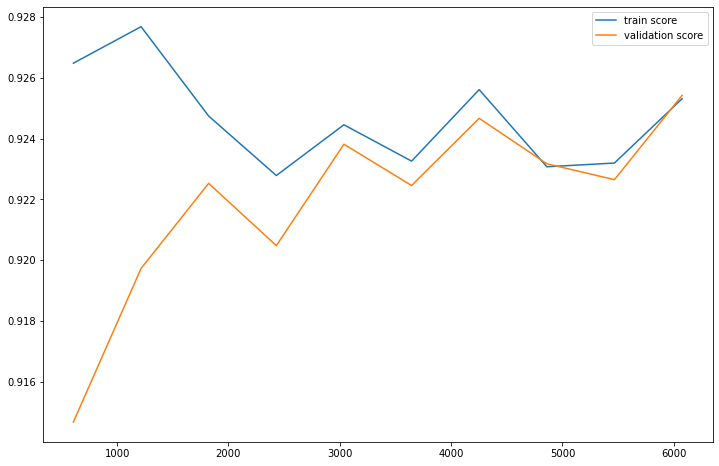

In [70]:
evaluation_losiqtique(classifier)

# Arbre de décision

In [71]:
model = DecisionTreeClassifier(random_state=0)
model

DecisionTreeClassifier(random_state=0)

In [72]:
def evaluation(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
#     
    N, train_score, val_score = learning_curve(model, X_train, y_train, cv=4,scoring = 'f1', train_sizes = np.linspace(0.1, 1 , 10))
    
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label= 'train score')
    plt.plot(N, val_score.mean(axis=1), label= 'validation score')
    plt.legend()

[[ 245   64]
 [  87 1630]]
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       309
           1       0.96      0.95      0.96      1717

    accuracy                           0.93      2026
   macro avg       0.85      0.87      0.86      2026
weighted avg       0.93      0.93      0.93      2026



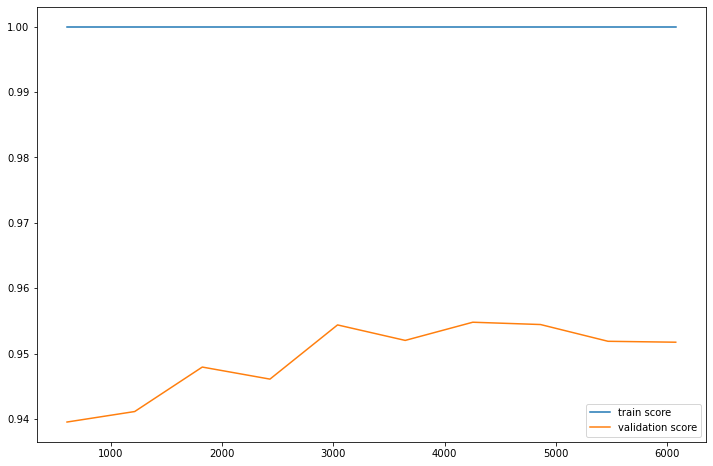

In [73]:
evaluation(model)

# KNK

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
model_knn = KNeighborsClassifier()

In [76]:
model_knn.fit(X_train, y_train)
model_knn.score(X_train, y_train)

0.9184051351684978

In [77]:
model_knn.score(X_test, y_test)

0.8943731490621916

In [78]:
#fonction d'évaluation du model
def evaluation_knn(model_knn):
    model_knn.fit(X_train,y_train)
    y_pred = model_knn.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    N, train_score, val_score = learning_curve(model_knn, X_train, y_train, cv=4,scoring = 'f1', train_sizes = np.linspace(0.1, 1 , 10))
    
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label= 'train score')
    plt.plot(N, val_score.mean(axis=1), label= 'validation score')
    plt.legend()

[[ 167  142]
 [  72 1645]]
              precision    recall  f1-score   support

           0       0.70      0.54      0.61       309
           1       0.92      0.96      0.94      1717

    accuracy                           0.89      2026
   macro avg       0.81      0.75      0.77      2026
weighted avg       0.89      0.89      0.89      2026



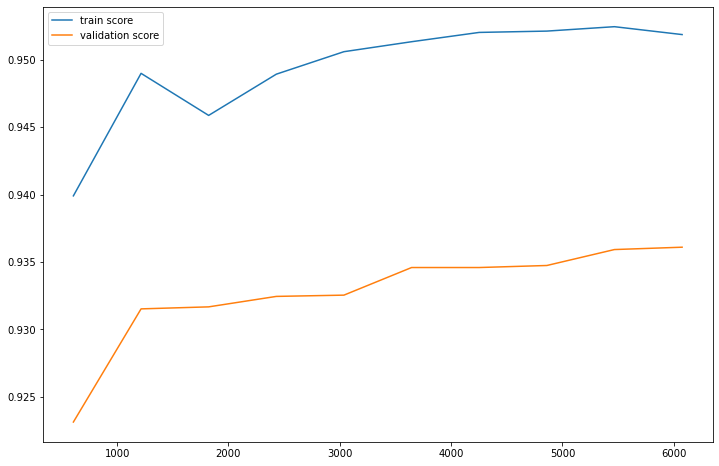

In [79]:
evaluation_knn(model_knn)

# Boosting

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

In [81]:
model_boost = GradientBoostingClassifier(n_estimators=40,max_depth=10,random_state=20) 
model_boost.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=40, random_state=20)

In [82]:
#score des model
print(model_boost.score(X_train, y_train))
print(model_boost.score(X_test, y_test))

0.9997531168991483
0.9461994076999013


In [83]:
#fonction d'évaluation du model
def evaluation_boost(model_boost):
    model_boost.fit(X_train,y_train)
    y_pred = model_boost.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    N, train_score, val_score = learning_curve(model_boost, X_train, y_train, cv=4,scoring = 'f1', train_sizes = np.linspace(0.1, 1 , 10))
    
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label= 'train score')
    plt.plot(N, val_score.mean(axis=1), label= 'validation score')
    plt.legend()

[[ 254   55]
 [  54 1663]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       309
           1       0.97      0.97      0.97      1717

    accuracy                           0.95      2026
   macro avg       0.90      0.90      0.90      2026
weighted avg       0.95      0.95      0.95      2026



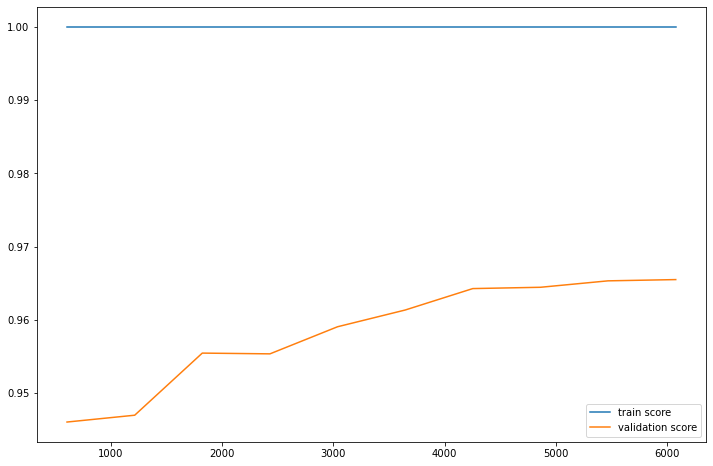

In [84]:
evaluation_boost(model_boost)

In [85]:
#exportation du model


In [86]:
import pickle

In [87]:
#ouverture en ecriture binnaire du model 
f = open("model.sav", "wb")

In [88]:
#sauvegarde dans le fichier référence
pickle.dump(model_boost, f)

In [48]:
#fermeture dui fichier
f.close()